# <h1><center> COMMUNICATION THROUGH DATA and STORY THROUGH VISUALIZATION </center></h1>

## Models 

### Meenakshi Nerolu           
### Created: Nov 18, 2020
### Updated : Dec 1, 2020

# Importing Libraries

In [1]:
## import packages:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools

# 1.Traffic Violation <a class="anchor" id="sec3"></a> 

## Reading "Traffic_Violations" data

In [2]:
    # Reading csv file
    #traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)
    
    ## Downloading & Reading csv file from website
    url = 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD'
    traffic = pd.read_csv(url,low_memory=False)

In [5]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(traffic):

    ## Formatting the Date
    ## Replace white space everywhere
    traffic.columns = traffic.columns.str.replace(' ', '')
    # Confirm the date column is in datetime format
    traffic['DateOfStop'] = pd.to_datetime(traffic['DateOfStop'])

    # Confirm the  time column is in datetime format
    traffic['TimeOfStop'] = pd.to_datetime(traffic['TimeOfStop'])
    # creating  new columns: date, year, month, day, time 
    traffic['date'] = pd.to_datetime(traffic['DateOfStop'])
    traffic['year'] = traffic['DateOfStop'].dt.year
    traffic['month'] = traffic['DateOfStop'].dt.month
    traffic['time'] = traffic['TimeOfStop'].dt.time
    traffic['hour'] = traffic['TimeOfStop'].dt.hour
    #traffic['day'] = traffic['DateOfStop'].dt.weekday_name
    traffic['day'] = traffic['DateOfStop'].dt.day_name()
    
    traffic = traffic.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    traffic = traffic[traffic.date >='01/01/2015']
    traffic = traffic[traffic.date <'12/02/2020']
    traffic = traffic.reset_index(drop=True)
    
    traffic['season']= "Fall"
    traffic.loc[(traffic['month'] < 3) | (traffic['month'] >= 12), "season"] = 'Winter'
    traffic.loc[(traffic['month'] < 6) & (traffic['month'] >= 3), "season"] = 'Spring'
    traffic.loc[(traffic['month'] < 9) & (traffic['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    traffic['Violation'] = pd.Series(1, index=traffic.index)
    
    return traffic

In [6]:
# All the above features are stored in new data frame "traffic_features"
traffic_features = useFeatures(traffic)

In [7]:
traffic_features.head()

SeqID DateOfStop          TimeOfStop Agency  \
0  ce97f76e-3f97-48d6-8969-806a35c364c4 2015-01-01 2020-12-02 02:45:00    MCP   
1  8c1fa298-0c8d-45b2-a2ad-5dadbe4d3b88 2015-01-01 2020-12-02 22:19:00    MCP   
2  53906ddc-478f-4112-96c4-22542edb4678 2015-01-01 2020-12-02 06:57:00    MCP   
3  d3c470c2-e799-4766-bdb2-3a81c92161a7 2015-01-01 2020-12-02 12:14:00    MCP   
4  eb692d5e-c268-4e1a-934b-b65798e0bb5b 2015-01-01 2020-12-02 21:09:00    MCP   

                             SubAgency  \
0                4th District, Wheaton   
1             5th District, Germantown   
2  Headquarters and Special Operations   
3             5th District, Germantown   
4               2nd District, Bethesda   

                                         Description  \
0      DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE   
1  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
2      DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE   
3         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH   
4                                     HEADLIGHTS (*)   

                   Location   Latitude  Longitude Accident  ...  \
0      NORBECK RD/ BAUER DR  39.064305 -77.052010       No  ...   
1        19731 FREDERICK RD  39.184117 -77.263797       No  ...   
2      600-BLOCK E. GUDE DR   0.000000   0.000000       No  ...   
3        MIDDLEBROOK RD/355  39.180120 -77.239490       No  ...   
4  N/B I-270/ROCKVILLE PIKE  39.021447 -77.105640       No  ...   

          ArrestType                            Geolocation       date  year  \
0  A - Marked Patrol                 (39.064305, -77.05201) 2015-01-01  2015   
1  A - Marked Patrol  (39.1841166666667, -77.2637966666667) 2015-01-01  2015   
2  A - Marked Patrol                             (0.0, 0.0) 2015-01-01  2015   
3   Q - Marked Laser                  (39.18012, -77.23949) 2015-01-01  2015   
4  A - Marked Patrol          (39.0214466666667, -77.10564) 2015-01-01  2015   

  month      time hour       day  season Violation  
0     1  02:45:00    2  Thursday  Winter         1  
1     1  22:19:00   22  Thursday  Winter         1  
2     1  06:57:00    6  Thursday  Winter         1  
3     1  12:14:00   12  Thursday  Winter         1  
4     1  21:09:00   21  Thursday  Winter         1  

[5 rows x 51 columns]

## Replace Yes or No by 0 

In [8]:
    ## Replace Yes and No by 1 and 0 respectively
traffic_replace = traffic_features.replace( {'Yes' : 1, 'No' : 0})
    
   
    ## replace the column name Year by Year_model
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
    
    # Delete the following columns as these columns have the highest number of NA's
delete_columns = traffic_replace[['SeqID', 'SearchConducted', 'SearchDisposition', 'SearchOutcome' , 'SearchReason', 'SearchReasonForStop', 'SearchType', 'SearchArrestReason']]
    
    # Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)

In [9]:
traffic_new["Color"].value_counts()

BLACK          240085
SILVER         207137
WHITE          182966
GRAY           137024
RED             85336
BLUE            80807
GREEN           31600
GOLD            30924
BLUE, DARK      24116
TAN             19439
MAROON          17480
BLUE, LIGHT     13213
BEIGE           10991
GREEN, DK        9649
GREEN, LGT       5321
BROWN            4677
YELLOW           3977
ORANGE           3722
BRONZE           2414
PURPLE           1944
MULTICOLOR        760
CREAM             546
COPPER            347
PINK              148
CHROME             30
CAMOUFLAGE         26
Name: Color, dtype: int64

In [10]:
#rename the colors :
traffic_new = traffic_new.replace({"BLUE, DARK":"BLUE" , "BLUE, LIGHT":"BLUE", "GREEN, DK":"GREEN", "GREEN, LGT":"GREEN" })
traffic_new.head()
print("Size of the data frame : ", traffic_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", traffic_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", traffic_new.columns)

Size of the data frame :  (1126251, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126251 entries, 0 to 1126250
Columns: 43 entries, DateOfStop to Violation
dtypes: bool(1), datetime64[ns](3), float64(3), int64(14), object(22)
memory usage: 362.0+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')


In [11]:
traffic_final = traffic_new.fillna(method='ffill')

In [12]:
traffic_final.head()

DateOfStop          TimeOfStop Agency                            SubAgency  \
0 2015-01-01 2020-12-02 02:45:00    MCP                4th District, Wheaton   
1 2015-01-01 2020-12-02 22:19:00    MCP             5th District, Germantown   
2 2015-01-01 2020-12-02 06:57:00    MCP  Headquarters and Special Operations   
3 2015-01-01 2020-12-02 12:14:00    MCP             5th District, Germantown   
4 2015-01-01 2020-12-02 21:09:00    MCP               2nd District, Bethesda   

                                         Description  \
0      DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE   
1  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
2      DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE   
3         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH   
4                                     HEADLIGHTS (*)   

                   Location   Latitude  Longitude  Accident  Belts  ...  \
0      NORBECK RD/ BAUER DR  39.064305 -77.052010         0      0  ...   
1        19731 FREDERICK RD  39.184117 -77.263797         0      0  ...   
2      600-BLOCK E. GUDE DR   0.000000   0.000000         0      0  ...   
3        MIDDLEBROOK RD/355  39.180120 -77.239490         0      0  ...   
4  N/B I-270/ROCKVILLE PIKE  39.021447 -77.105640         0      0  ...   

          ArrestType                            Geolocation       date  year  \
0  A - Marked Patrol                 (39.064305, -77.05201) 2015-01-01  2015   
1  A - Marked Patrol  (39.1841166666667, -77.2637966666667) 2015-01-01  2015   
2  A - Marked Patrol                             (0.0, 0.0) 2015-01-01  2015   
3   Q - Marked Laser                  (39.18012, -77.23949) 2015-01-01  2015   
4  A - Marked Patrol          (39.0214466666667, -77.10564) 2015-01-01  2015   

   month      time  hour       day  season Violation  
0      1  02:45:00     2  Thursday  Winter         1  
1      1  22:19:00    22  Thursday  Winter         1  
2      1  06:57:00     6  Thursday  Winter         1  
3      1  12:14:00    12  Thursday  Winter         1  
4      1  21:09:00    21  Thursday  Winter         1  

[5 rows x 43 columns]

In [13]:
#traffic_new[obj_traffic_new]=traffic_new[obj_traffic_new].fillna("other")
#traffic_new = traffic_new.fillna("")
#traffic_new.head()

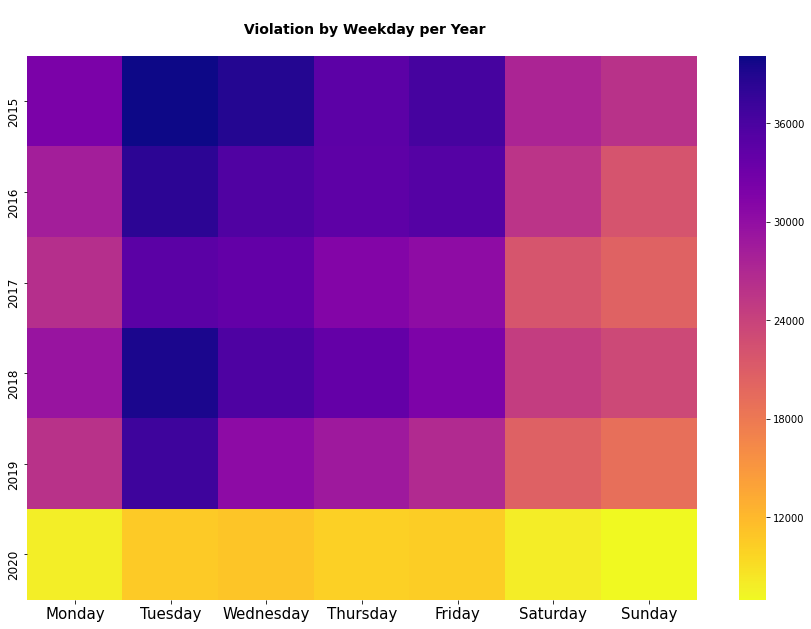

In [14]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
violationweekday = traffic_final.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
violationweekday = violationweekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(violationweekday, cmap='plasma_r')
plt.title('\n Violation by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/violationsbyweekdayperyear.jpg')
plt.show()

# Time Series  (Traffic Violation)

# Predicting Future Violation using *Facebook Prophet*

In [15]:
import time
import datetime 
import dateutil
import statsmodels.api as sm
from dateutil.parser import parse
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

Three new data frames are created to create time series analysis : entire dataframe (2015-2020), data frame from 2015-2019 and for the year 2020

### 2015-2020

In [16]:
#Creating a new dataframe for time series analysis with date as an index
traffic_timeseries=traffic_final.copy()
traffic_timeseries['date'] = pd.to_datetime(traffic_timeseries['date'])
traffic_timeseries=traffic_timeseries.set_index('date')

### 2015-2019

In [17]:
# Creating a Data Frame till 2020
traffic_timeseries_2019=traffic_timeseries
traffic_timeseries_2019 = traffic_timeseries_2019[(traffic_timeseries_2019['DateOfStop'] > '2015-01-01') & (traffic_timeseries_2019['DateOfStop'] < '2019-12-31')].sort_values(by=['DateOfStop'])

### January 2020 - December 1, 2020

In [18]:
# Creating a Data Frame till 2020
traffic_timeseries_2020=traffic_timeseries
traffic_timeseries_2020 = traffic_timeseries_2020[(traffic_timeseries_2020['DateOfStop'] > '2020-01-01') & (traffic_timeseries_2020['DateOfStop'] < '2020-10-11')].sort_values(by=['DateOfStop'])

In [19]:
plt.rcdefaults()
violation_per_day_2020=traffic_timeseries_2020['Violation'].groupby(traffic_timeseries_2020.index.date).sum()
violation_per_day_2019=traffic_timeseries_2019['Violation'].groupby(traffic_timeseries_2019.index.date).sum()
violation_per_day=traffic_timeseries['Violation'].groupby(traffic_timeseries.index.date).sum()
#violation_per_day_2020.plot()
#plt.xticks(rotation=45)
#plt.xlabel('Month')
#plt.ylabel('Number of Violation')
#plt.title("Timeseries for the year 2020")
#plt.show()

In [20]:
traffic_timeseries_prophet = pd.DataFrame(violation_per_day)
traffic_timeseries_prophet = traffic_timeseries_prophet.rename(columns={'Violation' : 'y'})
traffic_timeseries_prophet['ds'] = traffic_timeseries_prophet.index

traffic_timeseries_prophet_2019 = pd.DataFrame(violation_per_day_2019)
traffic_timeseries_prophet_2019 = traffic_timeseries_prophet_2019.rename(columns={'Violation' : 'y'})
traffic_timeseries_prophet_2019['ds'] = traffic_timeseries_prophet_2019.index

traffic_timeseries_prophet_2020 = pd.DataFrame(violation_per_day_2020)
traffic_timeseries_prophet_2020 = traffic_timeseries_prophet_2020.rename(columns={'Violation' : 'y'})
traffic_timeseries_prophet_2020['ds'] = traffic_timeseries_prophet_2020.index
#print(traffic_timeseries_prophet.head())
#print(traffic_timeseries_prophet_2019.head())
#print(traffic_timeseries_prophet_2020.head())

Prophet requires the variable names in the time series to be:
* y - Target
* ds - DateTime

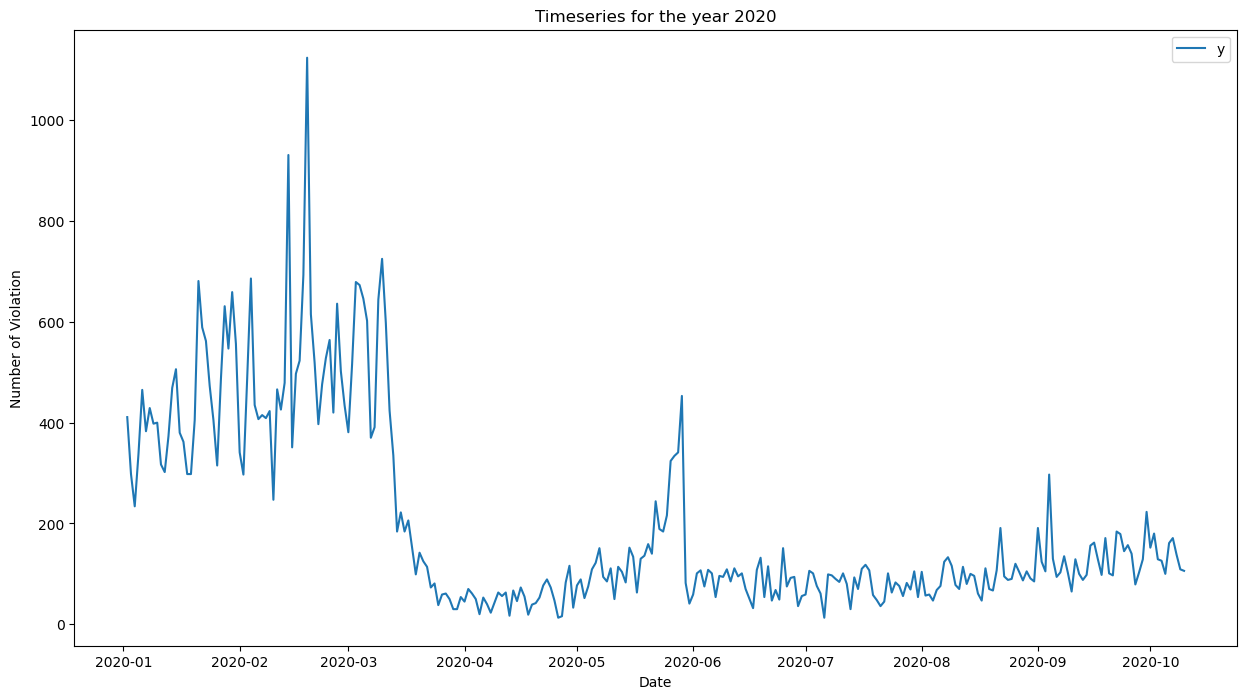

In [21]:
ax = traffic_timeseries_prophet_2020.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Number of Violation')
ax.set_xlabel('Date')
#plt.xticks(rotation=45)
plt.title("Timeseries for the year 2020")
#plt.show()
plt.show()

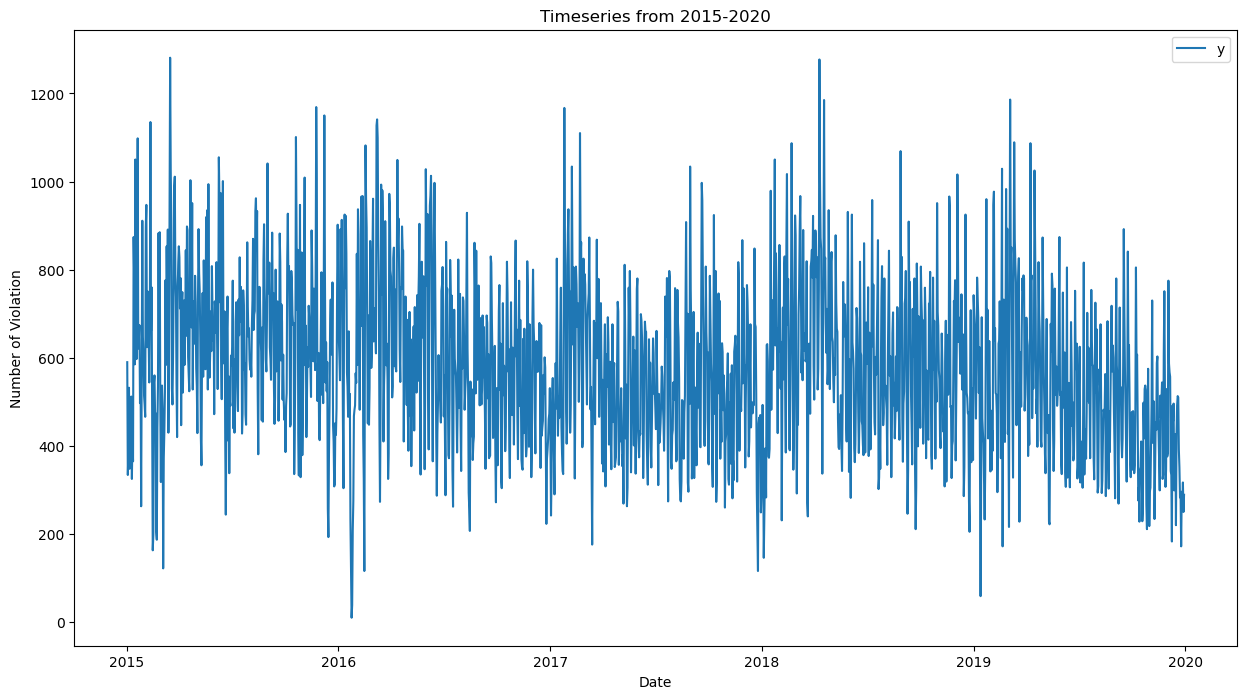

In [22]:
ax = traffic_timeseries_prophet_2019.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Number of Violation')
ax.set_xlabel('Date')
plt.title("Timeseries from 2015-2020")
plt.show()

In [23]:
#res = seasonal_decompose(violation_per_day, freq=365, model= 'additive')
#res.plot()
#plt.show()
#resplot = res.plot()
#resplot.savefig('Seasonal_Decompose.png', dpi=150)

## Fitting the Prophet Model

In [24]:
#Set the uncertainty interval to 95% (the Prophet default is 80%)
from fbprophet import Prophet

violation_prohet_model = Prophet(interval_width=0.95,daily_seasonality=True)
violation_prohet_model.fit(traffic_timeseries_prophet)

violation_prohet_model_2019 = Prophet(interval_width=0.95,daily_seasonality=True)
violation_prohet_model_2019.fit(traffic_timeseries_prophet_2019)

violation_prohet_model_2020 = Prophet(interval_width=0.95,daily_seasonality=True)
violation_prohet_model_2020.fit(traffic_timeseries_prophet_2020)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [25]:
#(Forecast for the next 36 month or 3 years.) 
future_dates_violation = violation_prohet_model.make_future_dataframe(periods=36, freq='MS') 
#future_dates_violation = violation_prohet_model.make_future_dataframe(periods=365)

future_dates_violation_2019 = violation_prohet_model_2019.make_future_dataframe(periods=36, freq='MS') 

future_dates_violation_2020 = violation_prohet_model_2020.make_future_dataframe(periods=12, freq='MS') 
#print(future_dates_violation.tail())
#print(future_dates_violation_2019.tail())
#print(future_dates_violation_2020.tail())

In [26]:
forecast_violation = violation_prohet_model.predict(future_dates_violation)

forecast_violation_2019 = violation_prohet_model_2019.predict(future_dates_violation_2019)

forecast_violation_2020 = violation_prohet_model_2020.predict(future_dates_violation_2020)

#print(forecast_violation[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#print(forecast_violation_2019[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#print(forecast_violation_2020[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

In the table above, **yhat** is forecasted value. The predict method will assign each row in future a predicted value which it names yhat. 

We can plot the forecast by calling the *Prophet.plot* method and passing in our forecast dataframe.

In [27]:
#violation_prohet_model.plot(forecast_violation, uncertainty=True)

### plot_components provides us a graph of trend and seasonality

#violation_model.plot_components(forecast_violation)

## Prohet Model - Plotly

In [28]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(violation_prohet_model_2019, forecast_violation_2019)
#plt.title("Timeseries from 2015-2020")

In [29]:
plot_plotly(violation_prohet_model_2020, forecast_violation_2020)

In [30]:
plot_components_plotly(violation_prohet_model_2019, forecast_violation_2019)

In [31]:
plot_components_plotly(violation_prohet_model_2020, forecast_violation_2020)

Once I have Forecast model, I looked at how it compares to actual values using a few different metrics - R-Squared and Mean Squared Error (MSE).

To do this, we need to build a combined dataframe with yhat from the forecasts and the original y values from the data.

In [106]:
metric_forecast_violation = forecast_violation.set_index('ds')[['yhat']].join(traffic_timeseries_prophet.set_index('ds').y).reset_index()
metric_forecast_violation_2020 = forecast_violation_2020.set_index('ds')[['yhat']].join(traffic_timeseries_prophet_2020.set_index('ds').y).reset_index()

In [97]:
metric_forecast_violation.tail()

ds         yhat   y
2192 2023-08-01  -781.959993 NaN
2193 2023-09-01  -862.005669 NaN
2194 2023-10-01 -1094.755851 NaN
2195 2023-11-01  -902.953620 NaN
2196 2023-12-01  -912.144085 NaN

In [107]:
metric_forecast_violation.dropna(inplace=True)
metric_forecast_violation.tail()
metric_forecast_violation_2020.dropna(inplace=True)

## R-Squared Value

In [100]:
r2_score(metric_forecast_violation.y, metric_forecast_violation.yhat)

0.6105796652466745

In [105]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Square Error (MSE) :", mean_squared_error(metric_forecast_violation.y, metric_forecast_violation.yhat))
print("Mean Absolute Error (MAE) :", mean_absolute_error(metric_forecast_violation.y, metric_forecast_violation.yhat))

Mean Square Error (MSE) : 21334.564530319076
Mean Absolute Error (MAE) : 112.72200097949099


# Machine Learning (Traffic Violation)

We will be looking at different columns to figure out predicting about the Citation Type. 

In [32]:
#CRNM_ML = CRNM_new.replace({'InjurySeverity' : {'SUSPECTED MINOR INJURY' : 'SUSPECTED_M_INJURY' , 'POSSIBLE INJURY': 'POSSIBLE_INJURY', 'SUSPECTED SERIOUS INJURY' : 'SUSPECTED_S_INJURY', 'NO APPARENT INJURY' : 'NO_APPARENT_INJURY','FATAL INJURY' : 'FATAL_INJURY' }})
traffic_ML = traffic_final.copy()
traffic_ML.head()

DateOfStop          TimeOfStop Agency                            SubAgency  \
0 2015-01-01 2020-12-02 02:45:00    MCP                4th District, Wheaton   
1 2015-01-01 2020-12-02 22:19:00    MCP             5th District, Germantown   
2 2015-01-01 2020-12-02 06:57:00    MCP  Headquarters and Special Operations   
3 2015-01-01 2020-12-02 12:14:00    MCP             5th District, Germantown   
4 2015-01-01 2020-12-02 21:09:00    MCP               2nd District, Bethesda   

                                         Description  \
0      DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE   
1  FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...   
2      DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE   
3         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH   
4                                     HEADLIGHTS (*)   

                   Location   Latitude  Longitude  Accident  Belts  ...  \
0      NORBECK RD/ BAUER DR  39.064305 -77.052010         0      0  ...   
1        19731 FREDERICK RD  39.184117 -77.263797         0      0  ...   
2      600-BLOCK E. GUDE DR   0.000000   0.000000         0      0  ...   
3        MIDDLEBROOK RD/355  39.180120 -77.239490         0      0  ...   
4  N/B I-270/ROCKVILLE PIKE  39.021447 -77.105640         0      0  ...   

          ArrestType                            Geolocation       date  year  \
0  A - Marked Patrol                 (39.064305, -77.05201) 2015-01-01  2015   
1  A - Marked Patrol  (39.1841166666667, -77.2637966666667) 2015-01-01  2015   
2  A - Marked Patrol                             (0.0, 0.0) 2015-01-01  2015   
3   Q - Marked Laser                  (39.18012, -77.23949) 2015-01-01  2015   
4  A - Marked Patrol          (39.0214466666667, -77.10564) 2015-01-01  2015   

   month      time  hour       day  season Violation  
0      1  02:45:00     2  Thursday  Winter         1  
1      1  22:19:00    22  Thursday  Winter         1  
2      1  06:57:00     6  Thursday  Winter         1  
3      1  12:14:00    12  Thursday  Winter         1  
4      1  21:09:00    21  Thursday  Winter         1  

[5 rows x 43 columns]

In [33]:
traffic_ML.columns

Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')

In [34]:
violtype_ml = traffic_ML[['ViolationType', 'Accident', 'Belts','PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
                            'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'year', 'hour'
                          ]]

In [35]:
violtype_ml.head()

ViolationType  Accident  Belts  PersonalInjury  PropertyDamage  Fatal  \
0      Citation         0      0               0               0      0   
1      Citation         0      0               0               0      0   
2      Citation         0      0               0               0      0   
3       Warning         0      0               0               0      0   
4         ESERO         0      0               0               0      0   

   CommercialLicense  HAZMAT  CommercialVehicle  Alcohol  WorkZone  year  hour  
0                  0       0                  0        0         0  2015     2  
1                  0       0                  0        0         0  2015    22  
2                  0       0                  0        0         0  2015     6  
3                  0       0                  0        0         0  2015    12  
4                  0       0                  0        0         0  2015    21

In [36]:
# import the class
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score
# Split the data into a training and test set.
#X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              #CRNM_ML['InjurySeverity'].values,test_size=0.20, random_state=99)
features = np.array(violtype_ml.drop('ViolationType' ,axis=1))
target =np.array( violtype_ml['ViolationType'])
X_train, X_test, y_train, y_test = train_test_split(features,target  
                                             ,test_size=0.20, random_state=99)
print("done")

done


In [37]:
print ('Shape of X:', features.shape)
print ('Shape of y:', target.shape)
print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)
print ('Shape of X_test:', X_test.shape)
print ('Shape of y_test:', y_test.shape)

Shape of X: (1126251, 12)
Shape of y: (1126251,)
Shape of X_train: (901000, 12)
Shape of y_train: (901000,)
Shape of X_test: (225251, 12)
Shape of y_test: (225251,)


# Logistic Regression

In [38]:
logmodel=LogisticRegression()
## fit the model with data
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("ROC score",roc_auc_score(y_test, y_pred))
#print("F1 score",f1_score(y_test, y_pred))

Accuracy: 0.5742438435345459


In [39]:
print('Accuracy1 :',logmodel.score(X_train,y_train))
print('Accuracy2 :',logmodel.score(X_test,y_test))

Accuracy1 : 0.572914539400666
Accuracy2 : 0.5742438435345459


## Model Evaluation using Confusion Matrix

In [40]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

    Citation       0.62      0.18      0.28     92647
       ESERO       0.00      0.00      0.00     10795
     Warning       0.57      0.92      0.70    121809

    accuracy                           0.57    225251
   macro avg       0.40      0.37      0.33    225251
weighted avg       0.56      0.57      0.50    225251

[[ 17093      0  75554]
 [   845      0   9950]
 [  9553      0 112256]]
0.5742438435345459


# Random Forest

In [41]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 59.96
              precision    recall  f1-score   support

    Citation   0.663727  0.268881  0.382719     92647
       ESERO   0.000000  0.000000  0.000000     10795
     Warning   0.586792  0.904301  0.711742    121809

    accuracy                       0.599611    225251
   macro avg   0.416840  0.391061  0.364820    225251
weighted avg   0.590314  0.599611  0.542303    225251



Predicted  Citation  Warning     All
Actual                              
Citation      24911    67736   92647
ESERO           964     9831   10795
Warning       11657   110152  121809
All           37532   187719  225251

# Prediction of Gender

In [42]:
traffic_ML.columns

Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')

In [43]:
gender_ml = traffic_ML[['ViolationType', 'Race', 'Color', 'VehicleType','Gender'
                          ]]
gender_ml['Gender'] = np.where(gender_ml['Gender'].str.contains('M'), 1, 0)

In [44]:
# Split the data into a training and test set.
#X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              #CRNM_ML['InjurySeverity'].values,test_size=0.20, random_state=99)
features_g =pd.get_dummies(gender_ml.drop('Gender' ,axis=1))
target_g =np.array( gender_ml['Gender'])
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(features_g,target_g  
                                             ,test_size=0.20, random_state=99)
print("done")

done


In [45]:
logmodel_g=LogisticRegression()
## fit the model with data
logmodel_g.fit(X_train_g, y_train_g)
y_pred_g = logmodel_g.predict(X_test_g)

print("Accuracy:",metrics.accuracy_score(y_test_g, y_pred_g))
#print("ROC score",roc_auc_score(y_test, y_pred))
#print("F1 score",f1_score(y_test, y_pred))

Accuracy: 0.6756285210720485


In [46]:
print('Accuracy1 :',logmodel_g.score(X_train_g,y_train_g))
print('Accuracy2 :',logmodel_g.score(X_test_g,y_test_g))

Accuracy1 : 0.6727502774694784
Accuracy2 : 0.6756285210720485


In [47]:
print(classification_report(y_test_g, y_pred_g))
print(confusion_matrix(y_test_g, y_pred_g))
print(accuracy_score(y_test_g,y_pred_g))

              precision    recall  f1-score   support

           0       0.53      0.01      0.02     73139
           1       0.68      1.00      0.81    152112

    accuracy                           0.68    225251
   macro avg       0.60      0.50      0.41    225251
weighted avg       0.63      0.68      0.55    225251

[[   612  72527]
 [   538 151574]]
0.6756285210720485


# Random forest (Gender)

In [48]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
random_forest_g = RandomForestClassifier(n_estimators=200)
random_forest_g.fit(X_train_g,y_train_g)
Y_pred_g = random_forest_g.predict(X_test_g)
random_forest_g.score(X_test_g, y_test_g)
acc_random_forest1_g = round(random_forest_g.score(X_test_g, y_test_g) * 100, 2)

sk_report_g = classification_report(
    digits=6,
    y_true=y_test_g, 
    y_pred=Y_pred_g)
print("Accuracy" , acc_random_forest1_g)
print(sk_report_g)
pd.crosstab(y_test_g, Y_pred_g, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 67.54
              precision    recall  f1-score   support

           0   0.504863  0.014903  0.028952     73139
           1   0.677044  0.992972  0.805125    152112

    accuracy                       0.675393    225251
   macro avg   0.590953  0.503938  0.417038    225251
weighted avg   0.621137  0.675393  0.553101    225251



Predicted     0       1     All
Actual                         
0          1090   72049   73139
1          1069  151043  152112
All        2159  223092  225251

In [49]:
#Train the model using the training sets y_pred=clf.predict(X_test)
random_forest_g.fit(X_train_g,y_train_g)

y_pred_g = random_forest_g.predict(X_test_g)
y_list_g = [random_forest_g]

In [50]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_g, y_pred_g))
print("Precision:",metrics.precision_score(y_test_g, y_pred_g))
print("Recall:",metrics.recall_score(y_test_g, y_pred_g))
print("F1 Score: {}".format(f1_score(y_test_g, y_pred_g)))
print("ROC score",roc_auc_score(y_test_g, y_pred_g))

Accuracy: 0.6752955591762079
Precision: 0.6770021785711083
Recall: 0.9928670979278427
F1 Score: 0.8050608485210317
ROC score 0.5038440960044879


# Crash Incident Data
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fk-dce5

# 2. Crash Reporting – Motorists Data 

In [51]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRI = 'https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD'
    CRI = pd.read_csv(url_CRI,low_memory=False)

In [52]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRI):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRI['Crash Date/Time'] = pd.to_datetime(CRI['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRI['date'] = pd.to_datetime(CRI['Crash Date/Time'])
    CRI['year'] = CRI['Crash Date/Time'].dt.year
    CRI['month'] = CRI['Crash Date/Time'].dt.month
    CRI['time'] = CRI['Crash Date/Time'].dt.time
    CRI['hour'] = CRI['Crash Date/Time'].dt.hour
    #CRI['day'] = CRI['Crash Date/Time'].dt.weekday_name
    CRI['day'] = CRI['Crash Date/Time'].dt.day_name()
    
    CRI = CRI.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRI = CRI[CRI.date >='01/01/2015']
    CRI = CRI[CRI.date <'12/02/2020']
    CRI = CRI.reset_index(drop=True)
    
    CRI['season']= "Fall"
    CRI.loc[(CRI['month'] < 3) | (CRI['month'] >= 12), "season"] = 'Winter'
    CRI.loc[(CRI['month'] < 6) & (CRI['month'] >= 3), "season"] = 'Spring'
    CRI.loc[(CRI['month'] < 9) & (CRI['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRI['crash'] = pd.Series(1, index=CRI.index)
    
    return CRI

In [53]:
# All the above features are stored in new data frame "CRI_features"
CRI_features = useFeatures(CRI)

In [54]:
## Replace white space everywhere
CRI_features.columns =CRI_features.columns.str.replace(' ', '')

In [55]:
 # Replace all NaN's by 0
#CRI_new = CRI_features.fillna(0)

#Renaming the column and replacing 
CRI_new =  CRI_features.rename(columns={"AgencyName": "Agency"})
CRI_new = CRI_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRI_new.head()

ReportNumber LocalCaseNumber Agency         ACRSReportType  \
0  MCP11520005        15000008    MCP  Property Damage Crash   
1  MCP2686000D        15000017    MCP  Property Damage Crash   
2  MCP2783000G        15000025    MCP           Injury Crash   
3  MCP2674000D        15000016    MCP  Property Damage Crash   
4  MCP23000002        15000197    MCP  Property Damage Crash   

       CrashDate/Time Hit/Run         RouteType  MilePoint MilePointDirection  \
0 2015-01-01 00:30:00     Yes  Maryland (State)       4.38              North   
1 2015-01-01 01:10:00      No              Ramp       0.15              South   
2 2015-01-01 01:14:00      No  Maryland (State)      25.21               East   
3 2015-01-01 01:26:00      No            County       0.76              North   
4 2015-01-01 02:00:00      No            County       1.81              North   

  LaneDirection  ...  Longitude                     Location  \
0         North  ... -77.102673  (39.02200107, -77.10267305)   
1         South  ... -77.265547     (39.19661, -77.26554667)   
2          East  ... -77.109803  (39.09621667, -77.10980333)   
3          West  ... -77.204349      (39.158059, -77.204349)   
4         North  ... -77.093848      (39.148678, -77.093848)   

                 date  year  month      time hour       day  season crash  
0 2015-01-01 00:30:00  2015      1  00:30:00    0  Thursday  Winter     1  
1 2015-01-01 01:10:00  2015      1  01:10:00    1  Thursday  Winter     1  
2 2015-01-01 01:14:00  2015      1  01:14:00    1  Thursday  Winter     1  
3 2015-01-01 01:26:00  2015      1  01:26:00    1  Thursday  Winter     1  
4 2015-01-01 02:00:00  2015      1  02:00:00    2  Thursday  Winter     1  

[5 rows x 52 columns]

In [56]:
CRI_new['Rush_time']=CRI_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRI(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [57]:
#apply function   
CRI_new['Rush_time']= CRI_new['Rush_time'].apply(rushhour_CRI)

In [58]:
CRI_final = CRI_new.fillna(method='ffill')

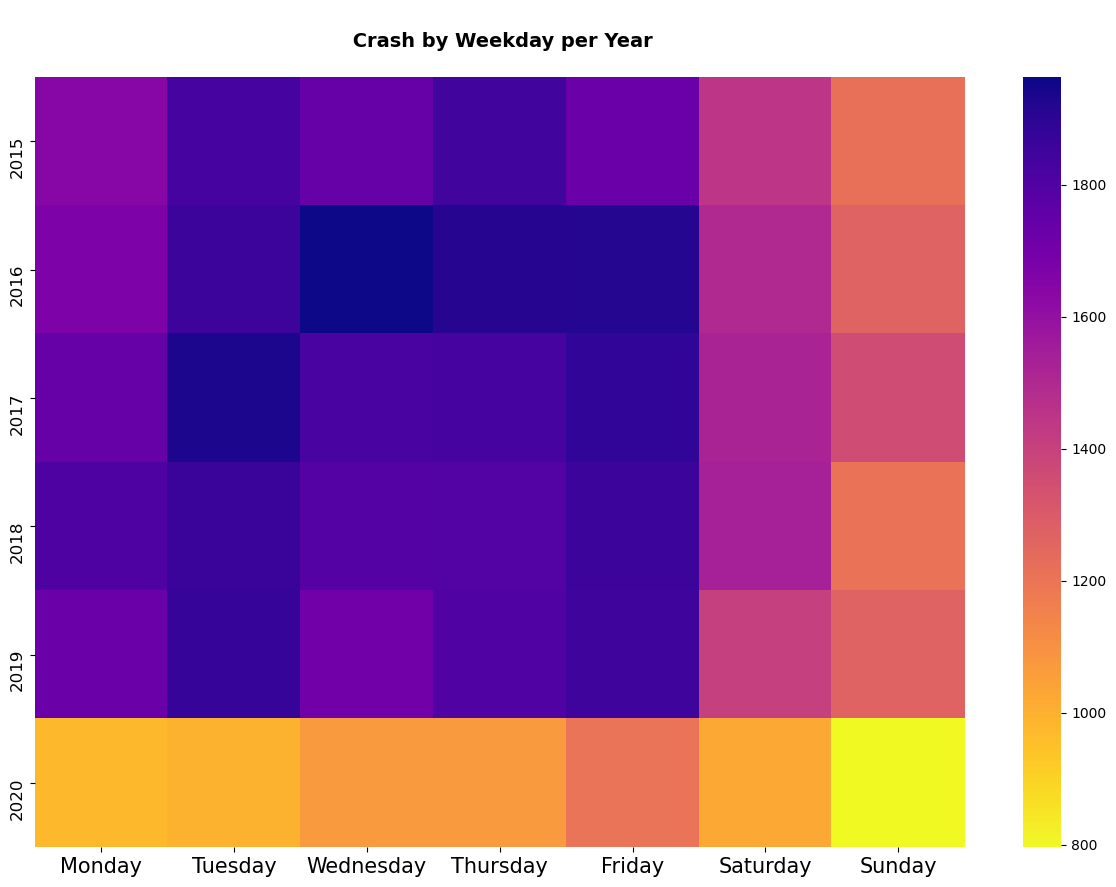

<Figure size 640x480 with 0 Axes>

In [59]:
CRIweekday = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
CRI_weekday = CRI_final.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
CRI_weekday = CRI_weekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=CRIweekday)
plt.figure(figsize=(15,10))
sns.heatmap(CRI_weekday, cmap='plasma_r')
plt.title('\n Crash by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('crashbyweekdayperyear.jpg')
plt.show()
plt.savefig('images/CRIbyweekdayperyear.jpg')

# 2b. Crash Reporting – Non - Motorists Data

In [60]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRNM = 'https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD'
    CRNM= pd.read_csv(url_CRNM,low_memory=False)

In [61]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRNM):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRNM['Crash Date/Time'] = pd.to_datetime(CRNM['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRNM['date'] = pd.to_datetime(CRNM['Crash Date/Time'])
    CRNM['year'] = CRNM['Crash Date/Time'].dt.year
    CRNM['month'] = CRNM['Crash Date/Time'].dt.month
    CRNM['time'] = CRNM['Crash Date/Time'].dt.time
    CRNM['hour'] = CRNM['Crash Date/Time'].dt.hour
    #CRNM['day'] = CRNM['Crash Date/Time'].dt.weekday_name
    CRI['day'] = CRI['Crash Date/Time'].dt.day_name()
    
    CRNM = CRNM.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRNM = CRNM[CRNM.date >='01/01/2015']
    CRNM = CRNM[CRNM.date <'12/02/2020']
    CRNM = CRNM.reset_index(drop=True)
    
    CRNM['season']= "Fall"
    CRNM.loc[(CRNM['month'] < 3) | (CRNM['month'] >= 12), "season"] = 'Winter'
    CRNM.loc[(CRNM['month'] < 6) & (CRNM['month'] >= 3), "season"] = 'Spring'
    CRNM.loc[(CRNM['month'] < 9) & (CRNM['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRNM['crash'] = pd.Series(1, index=CRNM.index)
    
    return CRNM

In [62]:
# All the above features are stored in new data frame "CRI_features"
CRNM_features = useFeatures(CRNM)

In [63]:
## Replace white space everywhere
CRNM_features.columns =CRNM_features.columns.str.replace(' ', '')

In [64]:
 # Replace all NaN's by 0
#CRNM_new = CRNM_features.fillna(0)

#Renaming the column and replacing 
CRNM_new =  CRNM_features.rename(columns={"AgencyName": "Agency"})
CRNM_new = CRNM_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRNM_new.head()

ReportNumber  LocalCaseNumber Agency ACRSReportType      CrashDate/Time  \
0  MCP2439000D         14064779    MCP   Injury Crash 2015-01-01 18:00:00   
1   DD5508000L         15000253    RPD   Injury Crash 2015-01-02 11:51:00   
2  MCP2690000N         15000473    MCP   Injury Crash 2015-01-03 20:31:00   
3  MCP27650015         15000583    MCP   Injury Crash 2015-01-04 14:55:00   
4  MCP9379000G         15000697    MCP   Injury Crash 2015-01-05 12:23:00   

          RouteType      RoadName Cross-StreetType Cross-StreetName  \
0            County    CONTOUR RD           County   HORIZON RUN RD   
1               NaN           NaN              NaN              NaN   
2               NaN           NaN              NaN              NaN   
3               NaN           NaN              NaN              NaN   
4  Maryland (State)  FREDERICK RD     Municipality   KING FARM BLVD   

                                Off-RoadDescription  ...   Latitude  \
0                                               NaN  ...  39.155240   
1               Parking Lot of 14939 Shady Grove Rd  ...  39.097495   
2             Parking Lot 13 at 11219 Grandview Ave  ...  39.038826   
3  Parking lot of Giant Food (12051 Rockville Pike)  ...  38.962827   
4                                               NaN  ...  39.116905   

   Longitude                     Location                date  year month  \
0 -77.197752     (39.1552397, -77.197752) 2015-01-01 18:00:00  2015     1   
1 -77.192452  (39.09749501, -77.19245195) 2015-01-02 11:51:00  2015     1   
2 -77.051365  (39.03882591, -77.05136508) 2015-01-03 20:31:00  2015     1   
3 -77.087983  (38.96282667, -77.08798333) 2015-01-04 14:55:00  2015     1   
4 -77.168492    (39.116905, -77.16849167) 2015-01-05 12:23:00  2015     1   

       time hour  season crash  
0  18:00:00   18  Winter     1  
1  11:51:00   11  Winter     1  
2  20:31:00   20  Winter     1  
3  14:55:00   14  Winter     1  
4  12:23:00   12  Winter     1  

[5 rows x 39 columns]

In [65]:
CRNM_new['Rush_time']=CRNM_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRNM(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [66]:
#apply function   
CRNM_new['Rush_time']= CRNM_new['Rush_time'].apply(rushhour_CRI)
#CRNM_new.head()

In [67]:
CRNM_final = CRNM_new.fillna(method='ffill')
CRNM_final.head()

ReportNumber  LocalCaseNumber Agency ACRSReportType      CrashDate/Time  \
0  MCP2439000D         14064779    MCP   Injury Crash 2015-01-01 18:00:00   
1   DD5508000L         15000253    RPD   Injury Crash 2015-01-02 11:51:00   
2  MCP2690000N         15000473    MCP   Injury Crash 2015-01-03 20:31:00   
3  MCP27650015         15000583    MCP   Injury Crash 2015-01-04 14:55:00   
4  MCP9379000G         15000697    MCP   Injury Crash 2015-01-05 12:23:00   

          RouteType      RoadName Cross-StreetType Cross-StreetName  \
0            County    CONTOUR RD           County   HORIZON RUN RD   
1            County    CONTOUR RD           County   HORIZON RUN RD   
2            County    CONTOUR RD           County   HORIZON RUN RD   
3            County    CONTOUR RD           County   HORIZON RUN RD   
4  Maryland (State)  FREDERICK RD     Municipality   KING FARM BLVD   

                                Off-RoadDescription  ...  Longitude  \
0                                               NaN  ... -77.197752   
1               Parking Lot of 14939 Shady Grove Rd  ... -77.192452   
2             Parking Lot 13 at 11219 Grandview Ave  ... -77.051365   
3  Parking lot of Giant Food (12051 Rockville Pike)  ... -77.087983   
4  Parking lot of Giant Food (12051 Rockville Pike)  ... -77.168492   

                      Location                date  year month      time hour  \
0     (39.1552397, -77.197752) 2015-01-01 18:00:00  2015     1  18:00:00   18   
1  (39.09749501, -77.19245195) 2015-01-02 11:51:00  2015     1  11:51:00   11   
2  (39.03882591, -77.05136508) 2015-01-03 20:31:00  2015     1  20:31:00   20   
3  (38.96282667, -77.08798333) 2015-01-04 14:55:00  2015     1  14:55:00   14   
4    (39.116905, -77.16849167) 2015-01-05 12:23:00  2015     1  12:23:00   12   

   season crash   Rush_time  
0  Winter     1     Evening  
1  Winter     1         Day  
2  Winter     1     Evening  
3  Winter     1   Afternoon  
4  Winter     1  Lunch Rush  

[5 rows x 40 columns]

In [ ]:
CRNMweekday = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
CRNM_weekday = CRNM_final.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
CRNM_weekday = CRNM_weekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=CRIweekday)
plt.figure(figsize=(15,10))
sns.heatmap(CRNM_weekday, cmap='plasma_r')
plt.title('\n Crash by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('crashbyweekdayperyear.jpg')
plt.show()
plt.savefig('images/CRDbyweekdayperyear.jpg')

# Time Series (Motorists Data)

### Predicting Future Crash related to Mototrists using *Facebook Prophet*

In [73]:
#2015-2020
#Creating a new dataframe for time series analysis with date as an index
#CRI_timeseries = CRI_final.copy()
CRI_timeseries = CRI_final.copy()
CRI_timeseries.rename(columns = {'CrashDate/Time':'CrashDate_Time'}, inplace = True) 
CRI_timeseries.head()

CRI_timeseries['date'] = pd.to_datetime(CRI_timeseries['date'])
CRI_timeseries = CRI_timeseries.set_index('date')

CRI_timeseries_2019 = CRI_timeseries
CRI_timeseries_2019 = CRI_timeseries_2019[(CRI_timeseries_2019['CrashDate_Time'] > '2015-01-01') & (CRI_timeseries_2019['CrashDate_Time'] < '2019-12-31')].sort_values(by=['CrashDate_Time'])

# Creating a Data Frame till 2020

CRI_timeseries_2020 = CRI_timeseries
CRI_timeseries_2020 = CRI_timeseries_2020[(CRI_timeseries_2020['CrashDate_Time'] > '2020-01-01') & (CRI_timeseries_2020['CrashDate_Time'] < '2020-10-11')].sort_values(by=['CrashDate_Time'])

In [74]:
plt.rcdefaults()
CRI_per_day_2020=CRI_timeseries_2020['crash'].groupby(CRI_timeseries_2020.index.date).sum()
CRI_per_day_2019=CRI_timeseries_2019['crash'].groupby(CRI_timeseries_2019.index.date).sum()
CRI_per_day=CRI_timeseries['crash'].groupby(CRI_timeseries.index.date).sum()


CRI_timeseries_prophet = pd.DataFrame(CRI_per_day)
CRI_timeseries_prophet = CRI_timeseries_prophet.rename(columns={'crash' : 'y'})
CRI_timeseries_prophet['ds'] = CRI_timeseries_prophet.index

CRI_timeseries_prophet_2019 = pd.DataFrame(CRI_per_day_2019)
CRI_timeseries_prophet_2019 = CRI_timeseries_prophet_2019.rename(columns={'crash' : 'y'})
CRI_timeseries_prophet_2019['ds'] = CRI_timeseries_prophet_2019.index

CRI_timeseries_prophet_2020 = pd.DataFrame(CRI_per_day_2020)
CRI_timeseries_prophet_2020 = CRI_timeseries_prophet_2020.rename(columns={'crash' : 'y'})
CRI_timeseries_prophet_2020['ds'] = CRI_timeseries_prophet_2020.index
#print(traffic_timeseries_prophet.head())
#print(traffic_timeseries_prophet_2019.head())
#print(traffic_timeseries_prophet_2020.head())

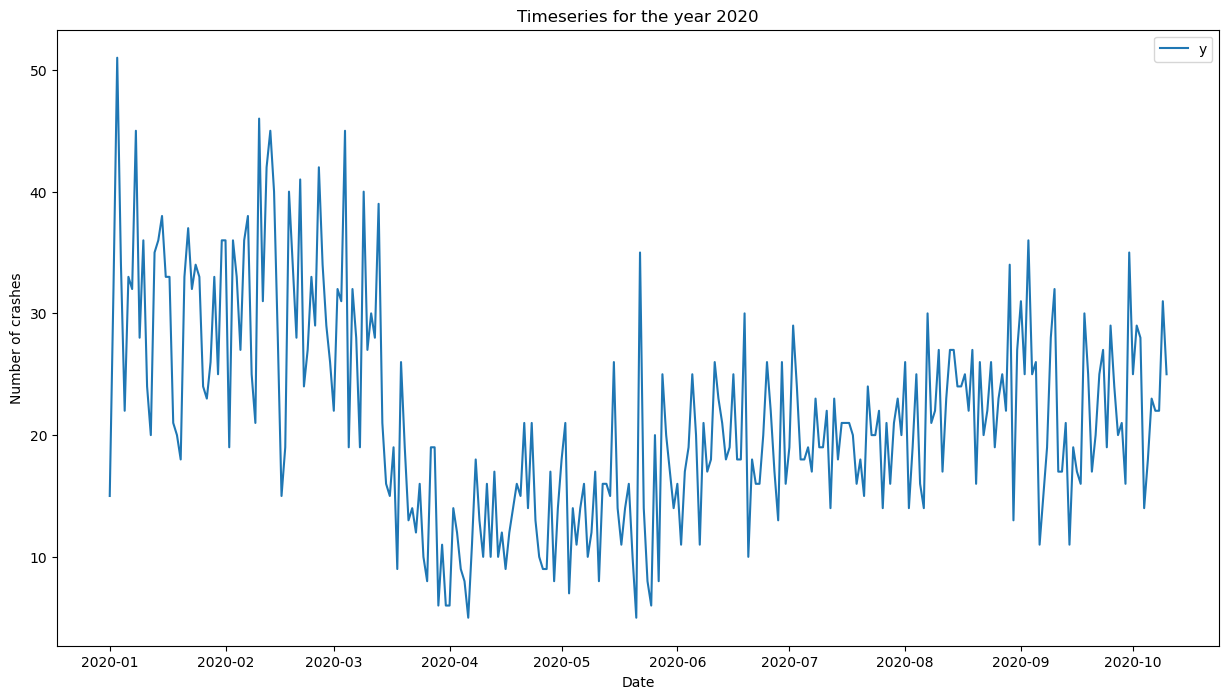

In [75]:
ax = CRI_timeseries_prophet_2020.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Date')
#plt.xticks(rotation=45)
plt.title("Timeseries for the year 2020")
#plt.show()
plt.show()

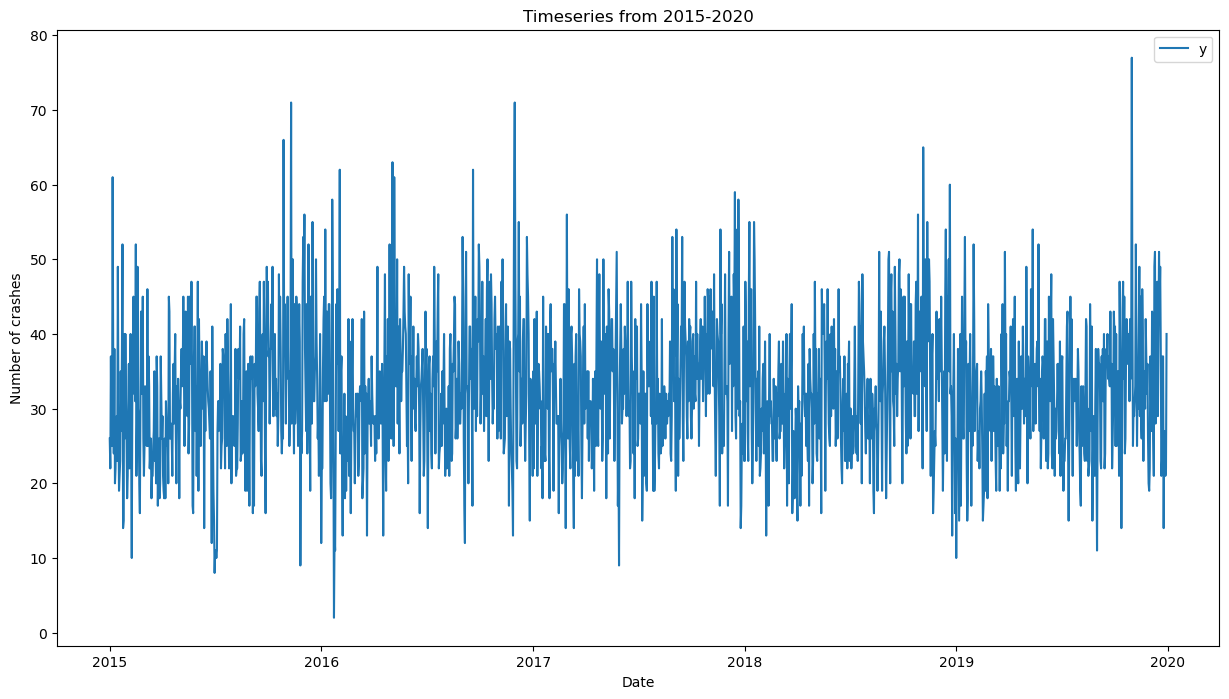

In [76]:
ax = CRI_timeseries_prophet_2019.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Date')
plt.title("Timeseries from 2015-2020")
plt.show()

## Fitting the Prophet Model - Motorists Data

In [77]:
#Set the uncertainty interval to 95% (the Prophet default is 80%)
#from fbprophet import Prophet

CRI_prohet_model = Prophet(interval_width=0.95,daily_seasonality=True)
CRI_prohet_model.fit(CRI_timeseries_prophet)

CRI_prohet_model_2019 = Prophet(interval_width=0.95,daily_seasonality=True)
CRI_prohet_model_2019.fit(CRI_timeseries_prophet_2019)

CRI_prohet_model_2020 = Prophet(interval_width=0.95,daily_seasonality=True)
CRI_prohet_model_2020.fit(CRI_timeseries_prophet_2020)

#(Forecast for the next 36 month or 3 years.) 
future_dates_CRI =CRI_prohet_model.make_future_dataframe(periods=36, freq='MS') 
#future_dates_violation = violation_prohet_model.make_future_dataframe(periods=365)

future_dates_CRI_2019 = CRI_prohet_model_2019.make_future_dataframe(periods=36, freq='MS') 

future_dates_CRI_2020 = CRI_prohet_model_2020.make_future_dataframe(periods=12, freq='MS') 
#print(future_dates_violation.tail())
#print(future_dates_violation_2019.tail())
#print(future_dates_violation_2020.tail())

forecast_CRI= CRI_prohet_model.predict(future_dates_CRI)

forecast_CRI_2019 = CRI_prohet_model_2019.predict(future_dates_CRI_2019)

forecast_CRI_2020 = CRI_prohet_model_2020.predict(future_dates_CRI_2020)

#print(forecast_violation[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#print(forecast_violation_2019[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#print(forecast_violation_2020[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [78]:
plot_plotly(CRI_prohet_model_2019, forecast_CRI_2019)
#plt.title("Timeseries from 2015-2020")

In [95]:
plot_plotly(CRI_prohet_model_2020, forecast_CRI_2020)

In [81]:
plot_components_plotly(CRI_prohet_model_2019, forecast_CRI_2019)

In [82]:
plot_components_plotly(CRI_prohet_model_2020, forecast_CRI_2020)

# Time Series (Non-Motorists Data)

### Predicting Future Crash related to Non-Mototrists using *Facebook Prophet*

In [83]:
#2015-2020
#Creating a new dataframe for time series analysis with date as an index
#CRI_timeseries = CRI_final.copy()
CRNM_timeseries = CRNM_final.copy()
CRNM_timeseries.rename(columns = {'CrashDate/Time':'CrashDate_Time'}, inplace = True) 
CRNM_timeseries.head()

CRNM_timeseries['date'] = pd.to_datetime(CRNM_timeseries['date'])
CRNM_timeseries = CRNM_timeseries.set_index('date')

CRNM_timeseries_2019 = CRNM_timeseries
CRNM_timeseries_2019 = CRNM_timeseries_2019[(CRNM_timeseries_2019['CrashDate_Time'] > '2015-01-01') & (CRNM_timeseries_2019['CrashDate_Time'] < '2019-12-31')].sort_values(by=['CrashDate_Time'])

# Creating a Data Frame till 2020

CRNM_timeseries_2020 = CRNM_timeseries
CRNM_timeseries_2020 = CRNM_timeseries_2020[(CRNM_timeseries_2020['CrashDate_Time'] > '2020-01-01') & (CRNM_timeseries_2020['CrashDate_Time'] < '2020-10-11')].sort_values(by=['CrashDate_Time'])

In [85]:
plt.rcdefaults()
CRNM_per_day_2020=CRNM_timeseries_2020['crash'].groupby(CRNM_timeseries_2020.index.date).sum()
CRNM_per_day_2019=CRNM_timeseries_2019['crash'].groupby(CRNM_timeseries_2019.index.date).sum()
CRNM_per_day=CRNM_timeseries['crash'].groupby(CRNM_timeseries.index.date).sum()


CRNM_timeseries_prophet = pd.DataFrame(CRNM_per_day)
CRNM_timeseries_prophet = CRNM_timeseries_prophet.rename(columns={'crash' : 'y'})
CRNM_timeseries_prophet['ds'] = CRNM_timeseries_prophet.index

CRNM_timeseries_prophet_2019 = pd.DataFrame(CRNM_per_day_2019)
CRNM_timeseries_prophet_2019 = CRNM_timeseries_prophet_2019.rename(columns={'crash' : 'y'})
CRNM_timeseries_prophet_2019['ds'] = CRNM_timeseries_prophet_2019.index

CRNM_timeseries_prophet_2020 = pd.DataFrame(CRNM_per_day_2020)
CRNM_timeseries_prophet_2020 = CRNM_timeseries_prophet_2020.rename(columns={'crash' : 'y'})
CRNM_timeseries_prophet_2020['ds'] = CRNM_timeseries_prophet_2020.index
#print(traffic_timeseries_prophet.head())
#print(traffic_timeseries_prophet_2019.head())
#print(traffic_timeseries_prophet_2020.head())

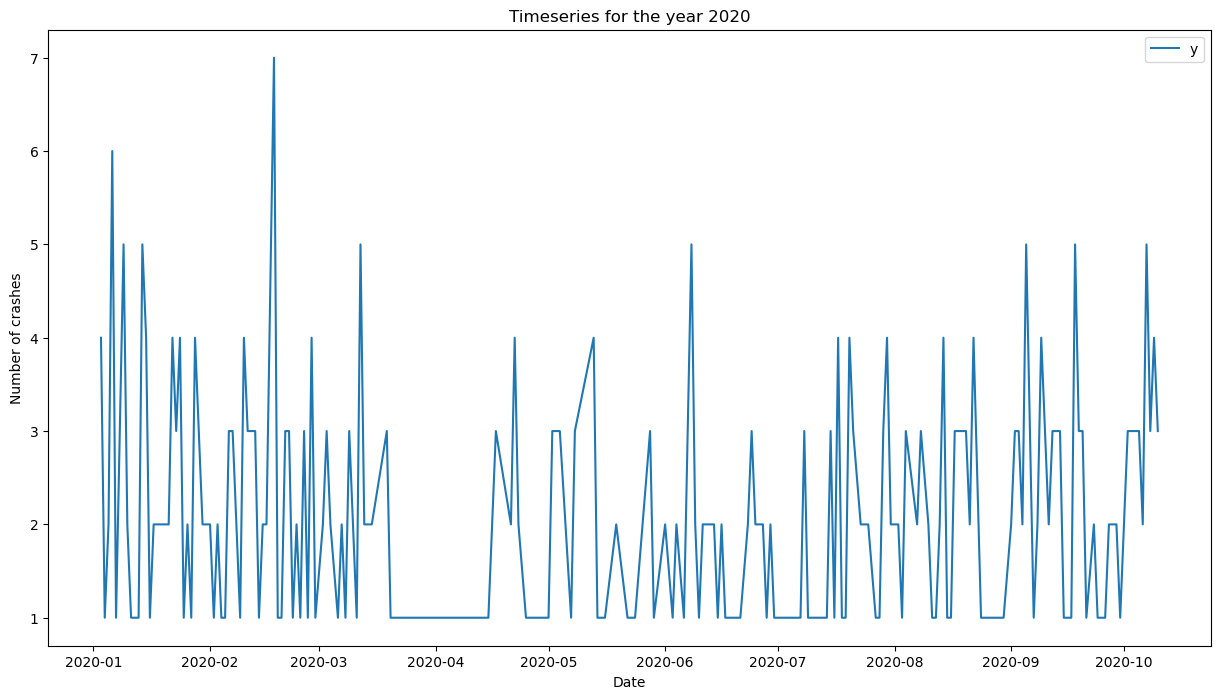

In [86]:
ax = CRNM_timeseries_prophet_2020.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Date')
#plt.xticks(rotation=45)
plt.title("Timeseries for the year 2020")
#plt.show()
plt.show()

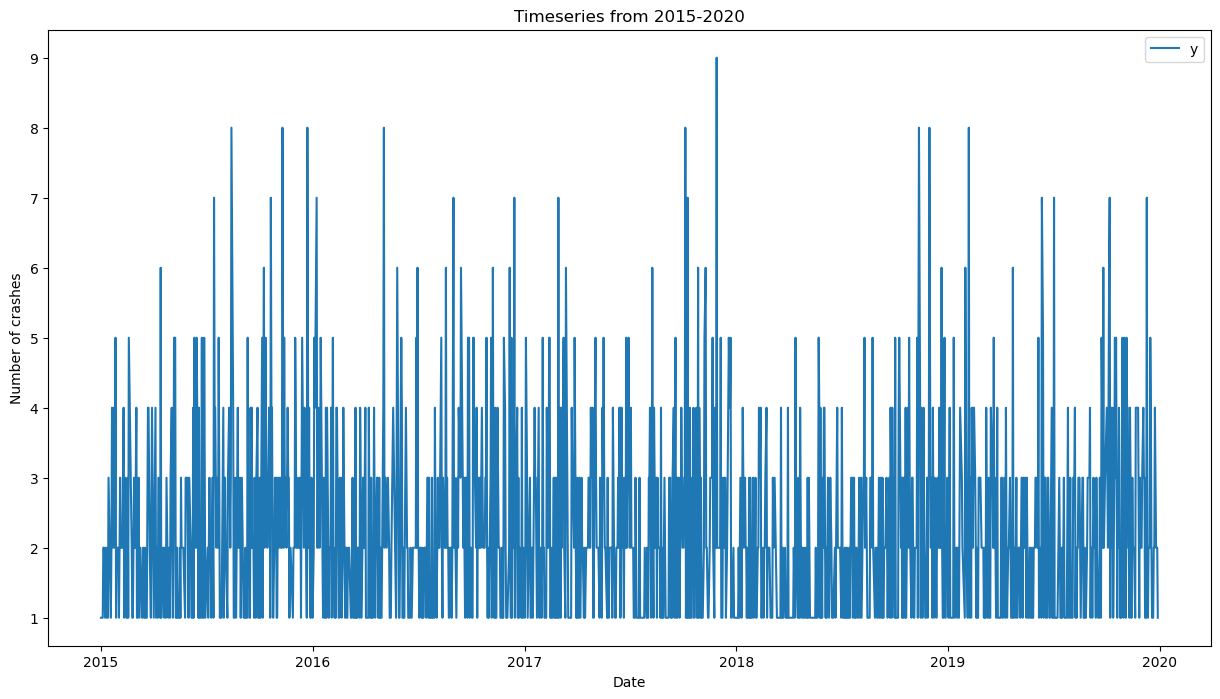

In [87]:
ax = CRNM_timeseries_prophet_2019.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Date')
plt.title("Timeseries from 2015-2020")
plt.show()

## Fitting the Prophet Model - Motorists Data

In [88]:
#Set the uncertainty interval to 95% (the Prophet default is 80%)
#from fbprophet import Prophet

CRNM_prohet_model = Prophet(interval_width=0.95,daily_seasonality=True)
CRNM_prohet_model.fit(CRNM_timeseries_prophet)

CRNM_prohet_model_2019 = Prophet(interval_width=0.95,daily_seasonality=True)
CRNM_prohet_model_2019.fit(CRNM_timeseries_prophet_2019)

CRNM_prohet_model_2020 = Prophet(interval_width=0.95,daily_seasonality=True)
CRNM_prohet_model_2020.fit(CRNM_timeseries_prophet_2020)

#(Forecast for the next 36 month or 3 years.) 
future_dates_CRNM =CRNM_prohet_model.make_future_dataframe(periods=36, freq='MS') 
#future_dates_violation = violation_prohet_model.make_future_dataframe(periods=365)

future_dates_CRNM_2019 = CRNM_prohet_model_2019.make_future_dataframe(periods=36, freq='MS') 

future_dates_CRNM_2020 = CRNM_prohet_model_2020.make_future_dataframe(periods=12, freq='MS') 
#print(future_dates_violation.tail())
#print(future_dates_violation_2019.tail())
#print(future_dates_violation_2020.tail())

forecast_CRNM= CRNM_prohet_model.predict(future_dates_CRNM)

forecast_CRNM_2019 = CRNM_prohet_model_2019.predict(future_dates_CRNM_2019)

forecast_CRNM_2020 = CRNM_prohet_model_2020.predict(future_dates_CRNM_2020)

#print(forecast_violation[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#print(forecast_violation_2019[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#print(forecast_violation_2020[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [89]:
plot_plotly(CRNM_prohet_model_2019, forecast_CRNM_2019)
#plt.title("Timeseries from 2015-2020")

In [90]:
plot_plotly(CRNM_prohet_model_2020, forecast_CRNM_2020)

In [91]:
plot_components_plotly(CRNM_prohet_model_2019, forecast_CRNM_2019)

In [92]:
plot_components_plotly(CRNM_prohet_model_2020, forecast_CRNM_2020)